# Testing

In [2]:
import random
import math
import colorsys
# import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import json

%pylab inline
figsize(12,8)

Populating the interactive namespace from numpy and matplotlib


/Users/fredhohman/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def display_colours(colours):
    colours = np.array(colours)
    figsize(13,2)
    N = colours.shape[0]
    for i,c in enumerate(colours):
        ax = subplot(1,N,(i+1), axisbg=c)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
 
    plt.show()

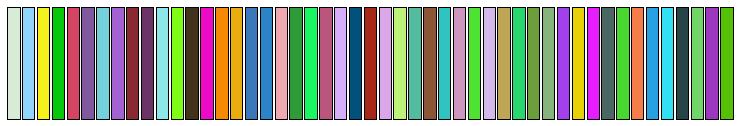

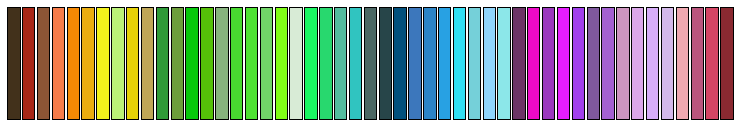

In [4]:
colours_length = 50
colours = []
for i in range(1, colours_length):
    colours.append (
        [
        random.random(),
        random.random(),
        random.random()
        ]
    )

# print(colours)
display_colours(colours)

def step (r,g,b, repetitions=1):
    lum = math.sqrt( .241 * r + .691 * g + .068 * b )

    h, s, v = colorsys.rgb_to_hsv(r,g,b)

    h2 = int(h * repetitions)
    lum2 = int(lum * repetitions)
    v2 = int(v * repetitions)

    if h2 % 2 == 1:
        v2 = repetitions - v2
        lum = repetitions - lum

    return (h2, lum, v2)

colours.sort(key=lambda (r,g,b): step(r,g,b,8))

# print(colours)
display_colours(colours)


# Top block "seasons"

In [84]:
data_path="/Users/fredhohman/Github/cs-7450/data/color/seasons.json"
with open(data_path) as json_data:
    d = json.load(json_data)
    print len(d['palettes'])

6


In [85]:
d['palettes'][0][:];

In [86]:
for season in range(0,6):
    temp = d['palettes'][season]
    temp_np = np.array(temp)
    temp_np = temp_np / 255.0
    temp_list = np.ndarray.tolist(temp_np)
#     display_colours(temp_list)
    temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
    sorted_np = np.round(np.array(temp_list)*255.0)
    sorted_list = np.ndarray.tolist(sorted_np)
    d['palettes'][season] = sorted_list

In [87]:
d['palettes'][0][:];

In [90]:
with open('/Users/fredhohman/Github/cs-7450/data/color/' + 'seasons_sorted.json', 'w') as outfile:
    json.dump(d, outfile)

# Middle block "series"

In [94]:
data_path="/Users/fredhohman/Github/cs-7450/data/color/series.json"
with open(data_path) as json_data:
    d = json.load(json_data)
    print len(d['palettes'])

60


In [95]:
for episode in range(0,60):
    temp = d['palettes'][episode]
    temp_np = np.array(temp)
    temp_np = temp_np / 255.0
    temp_list = np.ndarray.tolist(temp_np)
#     display_colours(temp_list)
    temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
    sorted_np = np.round(np.array(temp_list)*255.0)
    sorted_list = np.ndarray.tolist(sorted_np)
    d['palettes'][episode] = sorted_list

In [96]:
with open('/Users/fredhohman/Github/cs-7450/data/color/' + 'series_sorted.json', 'w') as outfile:
    json.dump(d, outfile)

# Bottom block "chunks"

In [105]:
def make_episode_list():
    
    episode_list = []

    for season_num in [1, 2, 3, 4, 5, 6]:
        for episode_num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
            episode = 's' + str(season_num) + 'e' + str(episode_num)
            episode_list.append(episode)
    return episode_list

In [106]:
episode_list = make_episode_list()

60


In [112]:
for episode in episode_list:
    data_path="/Users/fredhohman/Github/cs-7450/data/color/" + episode + "_chunk.json"
    with open(data_path) as json_data:
        d = json.load(json_data)

    for chunk in range(0,60):
        temp = d['palettes'][chunk]
        temp_np = np.array(temp)
        temp_np = temp_np / 255.0
        temp_list = np.ndarray.tolist(temp_np)
    #     display_colours(temp_list)
        temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
    #     display_colours(temp_list)
        sorted_np = np.round(np.array(temp_list)*255.0)
        sorted_list = np.ndarray.tolist(sorted_np)
        d['palettes'][chunk] = sorted_list

    with open('/Users/fredhohman/Github/cs-7450/data/color/' + episode + '_chunk_sorted.json', 'w') as outfile:
        json.dump(d, outfile)

# title intro image

In [9]:
data_path="/Users/fredhohman/Github/cs-7450/intro.json"
with open(data_path) as json_data:
    d = json.load(json_data)

temp = d['palettes']
temp_np = np.array(temp)
temp_np = temp_np / 255.0
temp_list = np.ndarray.tolist(temp_np)
#     display_colours(temp_list)
temp_list.sort(key=lambda (r,g,b): step(r,g,b,8))
#     display_colours(temp_list)
sorted_np = np.round(np.array(temp_list)*255.0)
sorted_list = np.ndarray.tolist(sorted_np)
d['palettes'][chunk] = sorted_list




[[[119, 64, 36], [57, 25, 16], [182, 129, 66], [220, 194, 114], [243, 246, 225], [237, 234, 164], [151, 121, 95], [188, 162, 148], [84, 84, 52], [196, 200, 188]]]
